In [1]:
import pandas as pd
import string
import numpy as np
from textstat import flesch_reading_ease

In [2]:
basic_stopwords = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
    'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself',
    'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
    'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during',
    'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
    'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some',
    'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
    'too', 'very', 'can', 'will', 'just', 'don', 'should', 'now'
}

In [3]:
def compute_stylometric_features(text):
    tokens = text.split()
    words = [w for w in tokens if w.isalpha()]
    word_count = len(words)
    char_count = sum(len(word) for word in words)
    avg_word_length = char_count / word_count if word_count else 0
    unique_words = set(words)
    lexical_diversity = len(unique_words) / word_count if word_count else 0
    punctuation_count = len([c for c in text if c in string.punctuation])
    stopword_count = len([w for w in words if w.lower() in basic_stopwords])
    stopword_ratio = stopword_count / word_count if word_count else 0
    readability = flesch_reading_ease(text)
    
    return {
        'avg_word_length': avg_word_length,
        'lexical_diversity': lexical_diversity,
        'punctuation_count': punctuation_count,
        'stopword_ratio': stopword_ratio,
        'flesch_reading_ease': readability,
        'word_count': word_count
    }

In [4]:
df = pd.read_csv("coauthor_combined_cleaned.csv")

In [5]:
df = df[
    (df['eventName'] == 'text-insert') &
    (df['eventSource'].isin(['user', 'model'])) &
    (df['textDelta'].notna()) &
    (df['textDelta'].str.strip() != "")
].copy()

In [6]:
features_list = []
for _, row in df.iterrows():
    text = str(row['textDelta'])
    source = row['eventSource']
    feats = compute_stylometric_features(text)
    feats['source'] = source
    features_list.append(feats)

In [7]:
stylometric_df = pd.DataFrame(features_list)

In [8]:
stylometric_df.to_csv("stylometric_analysis_output.csv", index=False)

In [10]:
stylometric_df.head()

,avg_word_length,lexical_diversity,punctuation_count,stopword_ratio,flesch_reading_ease,word_count,source
0,0.0,0.0,20,0.0,75.875,0,user
1,0.0,0.0,20,0.0,75.875,0,user
2,0.0,0.0,20,0.0,75.875,0,user
3,0.0,0.0,20,0.0,75.875,0,user
4,0.0,0.0,20,0.0,83.320,0,user


In [9]:
stylometric_df.describe()

,avg_word_length,lexical_diversity,punctuation_count,stopword_ratio,flesch_reading_ease,word_count
count,2.293624e+06,2.293624e+06,2.293624e+06,2.293624e+06,2.293624e+06,2.293624e+06
mean,3.731084e-04,7.831153e-05,2.005536e+01,4.405010e-05,8.051955e+01,9.971120e-04
std,4.212818e-02,8.638639e-03,1.665606e+01,5.141512e-03,9.555878e+02,1.438275e-01
min,0.000000e+00,0.000000e+00,1.400000e+01,0.000000e+00,-1.447108e+06,0.000000e+00
25%,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,8.332000e+01,0.000000e+00
50%,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,8.332000e+01,0.000000e+00
75%,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,8.332000e+01,0.000000e+00
max,9.500000e+00,1.000000e+00,2.523700e+04,1.000000e+00,1.002400e+02,6.200000e+01


### visualise

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
sns.set(style="whitegrid")
features = [
    'avg_word_length', 
    'lexical_diversity', 
    'punctuation_count', 
    'stopword_ratio', 
    'flesch_reading_ease', 
    'word_count'
]

/var/folders/tp/65gd6xdd44xf84np6mcj1w480000gp/T/ipykernel_5668/2693415504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='source', y=feature, data=stylometric_df, palette='pastel')


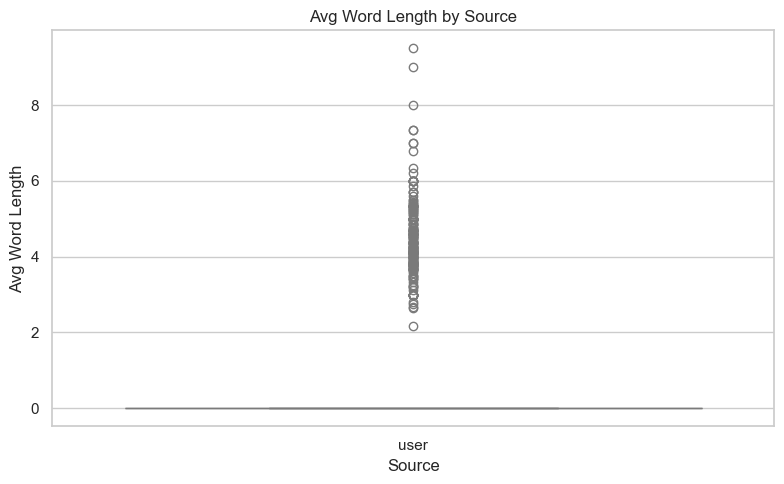

/var/folders/tp/65gd6xdd44xf84np6mcj1w480000gp/T/ipykernel_5668/2693415504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='source', y=feature, data=stylometric_df, palette='pastel')


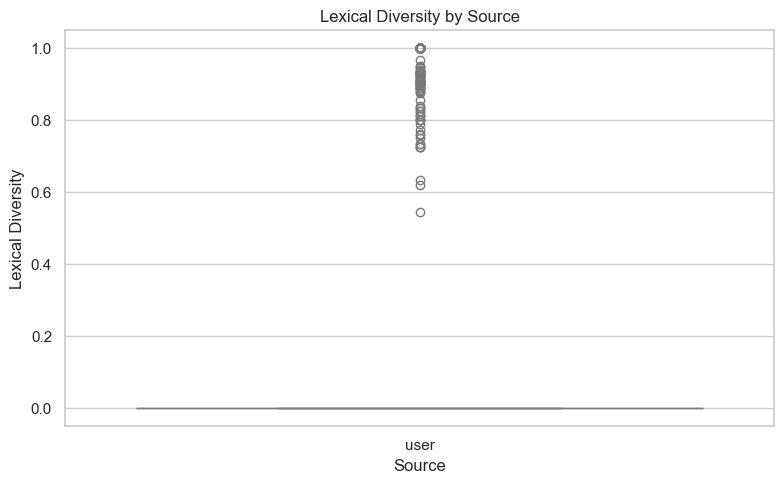

/var/folders/tp/65gd6xdd44xf84np6mcj1w480000gp/T/ipykernel_5668/2693415504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='source', y=feature, data=stylometric_df, palette='pastel')


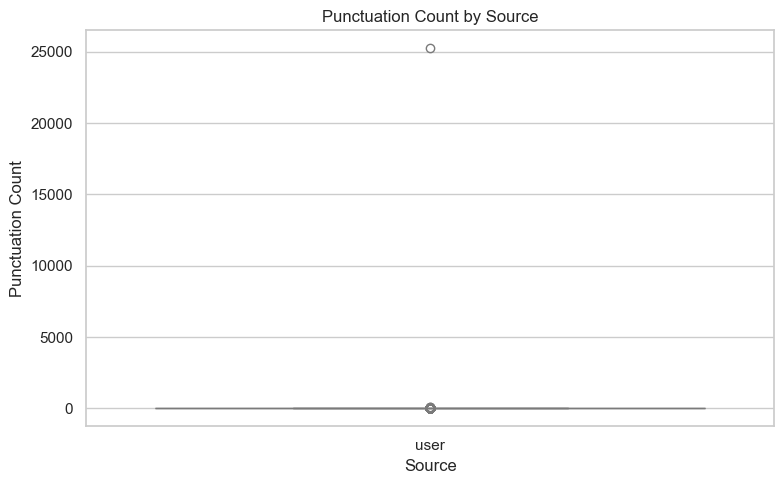

/var/folders/tp/65gd6xdd44xf84np6mcj1w480000gp/T/ipykernel_5668/2693415504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='source', y=feature, data=stylometric_df, palette='pastel')


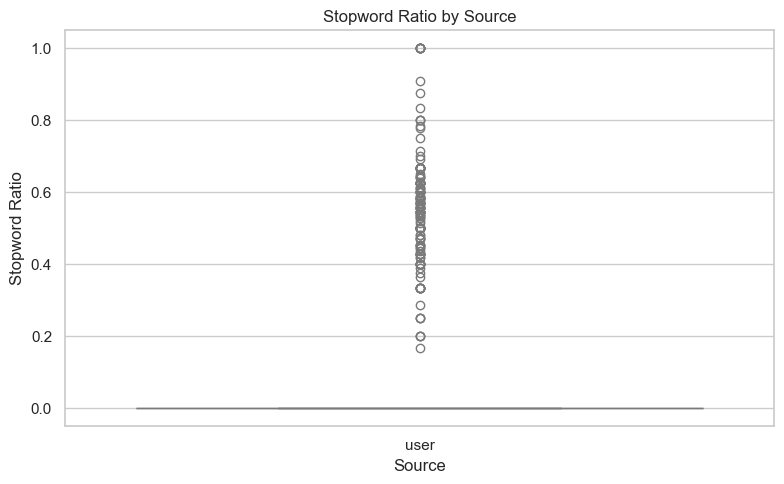

/var/folders/tp/65gd6xdd44xf84np6mcj1w480000gp/T/ipykernel_5668/2693415504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='source', y=feature, data=stylometric_df, palette='pastel')


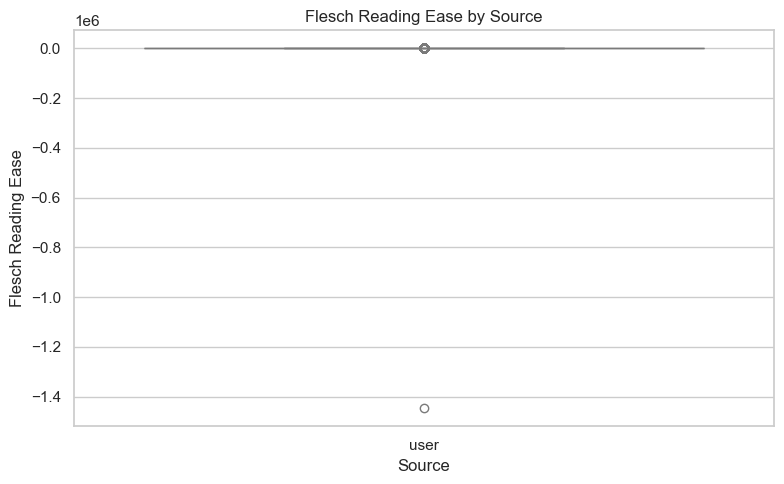

/var/folders/tp/65gd6xdd44xf84np6mcj1w480000gp/T/ipykernel_5668/2693415504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='source', y=feature, data=stylometric_df, palette='pastel')


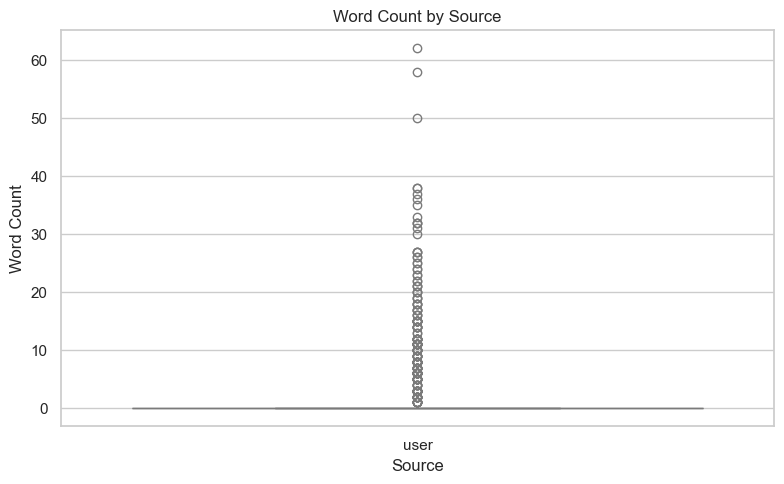

In [13]:
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='source', y=feature, data=stylometric_df, palette='pastel')
    plt.title(f'{feature.replace("_", " ").title()} by Source')
    plt.xlabel('Source')
    plt.ylabel(feature.replace("_", " ").title())
    plt.tight_layout()
    plt.show()